In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from sklearn import metrics

In [3]:
# Load the MNIST OCR digit dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

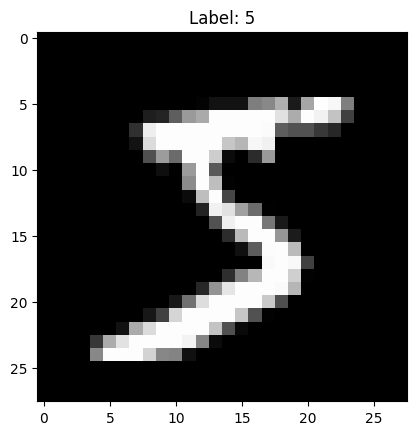

In [4]:
# Visualize the first training image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [5]:
# Print shape of the datasets
print("Original x_train shape:", x_train.shape)
print("Original y_train shape:", y_train.shape)
print("Original x_test shape:", x_test.shape)
print("Original y_test shape:", y_test.shape)

Original x_train shape: (60000, 28, 28)
Original y_train shape: (60000,)
Original x_test shape: (10000, 28, 28)
Original y_test shape: (10000,)


In [6]:
# Reshape input data from (28, 28) to (784,) for fully connected layers
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')


In [7]:
# Normalize pixel values to range [0, 1]
x_train /= 255
x_test /= 255

In [8]:
# Convert class vectors (digits) to binary class matrices (one-hot encoding)
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [9]:
# Define the Deep Neural Network architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\samik\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [11]:
# Train the model
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8575 - loss: 0.4513 - val_accuracy: 0.9679 - val_loss: 0.1079
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9663 - loss: 0.1112 - val_accuracy: 0.9707 - val_loss: 0.0916
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9755 - loss: 0.0762 - val_accuracy: 0.9785 - val_loss: 0.0707
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9828 - loss: 0.0556 - val_accuracy: 0.9757 - val_loss: 0.0810
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9841 - loss: 0.0483 - val_accuracy: 0.9786 - val_loss: 0.0765
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9882 - loss: 0.0369 - val_accuracy: 0.9786 - val_loss: 0.0770
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9896 - loss: 0.0310 - val_accuracy: 0.9823 - val_loss: 0.0698
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9907 - loss: 0.0288 - val_ac

In [12]:
# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07328666001558304
Test accuracy: 0.9854000210762024
